In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import glob
import seaborn as sns
import functools
from datetime import datetime
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [2]:
fireDataFrame = pd.read_csv('all_fd_incidents.csv')  ## Read CSV file
#print(type(fireDataFrame))


In [3]:
population_ds = pd.read_excel('pop.xlsx')

In [4]:
population_ds

,Year,Population,Growth Rate
0,2019,3231000,0.0059
1,2018,3212000,0.0101
2,2017,3180000,0.0102
3,2016,3148000,0.0099
4,2015,3117000,0.0100
5,2014,3086000,0.0101
6,2013,3055000,0.0103
7,2012,3024000,0.0100
8,2011,2994000,0.0101
9,2010,2964000,0.0099


In [5]:
fireDataFrame.drop(fireDataFrame.loc[fireDataFrame['year_response']== 2020].index, inplace=True)   ## Remove year 2020 data

In [6]:
## YEAR TO YEAR TREND
year_count  = fireDataFrame['year_response'].value_counts()

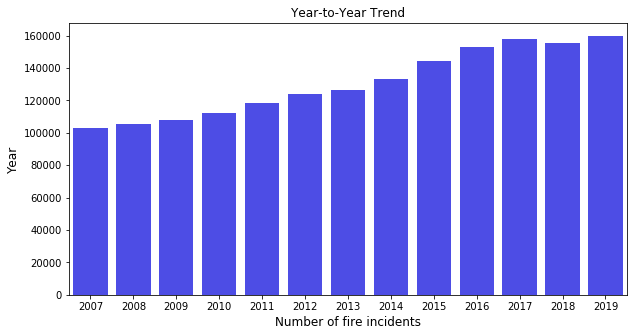

In [7]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = year_count.index, y = year_count.values,alpha=0.8, color = 'b', orient = 'v')
plt.title('Year-to-Year Trend')
plt.xlabel('Number of incidents', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()


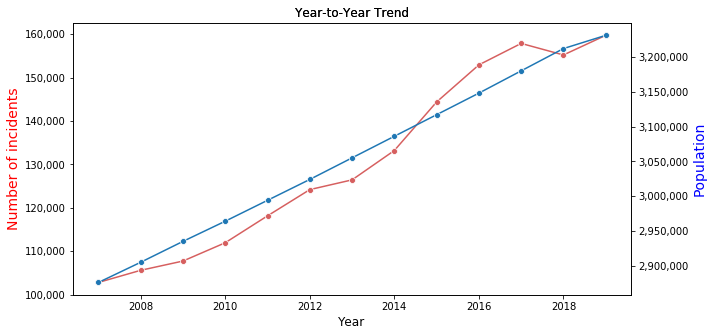

In [43]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = year_count.index, y = year_count.values, color = 'r', marker = 'o')
ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Year-to-Year Trend')
ax.set_ylabel('Number of incidents', fontsize=14, color = 'red')
#ax.set_xlabel('Year', fontsize=12)
ax2 = ax.twinx()
ax2 = sns.lineplot(x = population_ds['Year'], y = population_ds['Population'], marker = 'o')
ax2.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#sns.lineplot(x = year_count.index, y = year_count.values)
#sns.lineplot(population_ds['Year'],population_ds['Population'])
plt.title('Year-to-Year Trend')
ax.set_ylabel('Number of incidents', fontsize=14, color = 'red')
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Population', fontsize = 14, color = 'blue')
plt.savefig('yearlyincidents.jpg')
plt.show()

In [85]:
## Get the total number of incidents every month across all the 13 years and make it into a pivot table
firePivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)

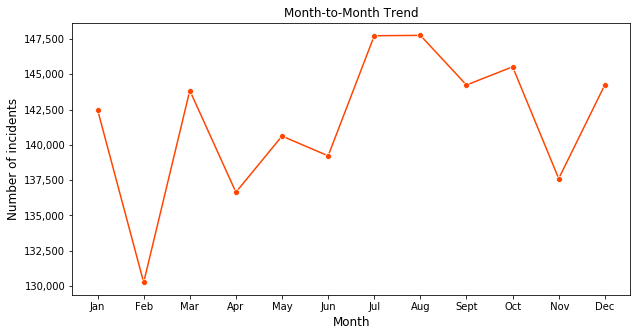

In [41]:
#Find total number of incidents every month across all the 13 years and plot the line plot
month_count  = fireDataFrame['month_response'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
#plt.figure(figsize=(10,5))
ax = sns.lineplot(month_count.index, month_count.values, color = 'orangered', marker = 'o')
ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Month-to-Month Trend')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct',' Nov', 'Dec'])
plt.ylabel('Number of incidents', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.savefig('month2month.jpg')
plt.show()

In [23]:
## Read all the years' data

y_07 = pd.read_csv('fd_incidents_2007_datasd_v1.csv')
y_08 = pd.read_csv('fd_incidents_2008_datasd_v1.csv')
y_09 = pd.read_csv('fd_incidents_2009_datasd_v1.csv')
y_10 = pd.read_csv('fd_incidents_2010_datasd_v1.csv')
y_11 = pd.read_csv('fd_incidents_2011_datasd_v1.csv')
y_12 = pd.read_csv('fd_incidents_2012_datasd_v1.csv')
y_13 = pd.read_csv('fd_incidents_2013_datasd_v1.csv')
y_14 = pd.read_csv('fd_incidents_2014_datasd_v1.csv')
y_15 = pd.read_csv('fd_incidents_2015_datasd_v1.csv')
y_16 = pd.read_csv('fd_incidents_2016_datasd_v1.csv')
y_17 = pd.read_csv('fd_incidents_2017_datasd_v1.csv')
y_18 = pd.read_csv('fd_incidents_2018_datasd_v1.csv')
y_19 = pd.read_csv('fd_incidents_2019_datasd_v1.csv')

C:\Users\sumitha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


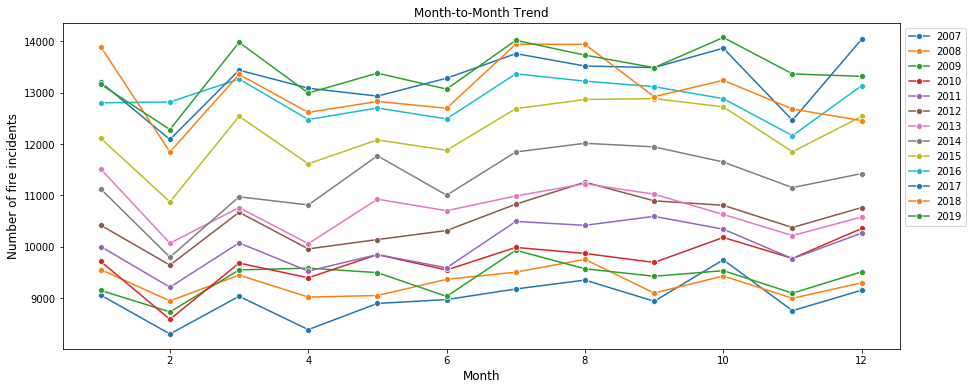

In [24]:
## Year wise plot of the number of incidents across each month

month_count_07  = y_07['month_response'].value_counts()
month_count_08  = y_08['month_response'].value_counts()
month_count_09  = y_09['month_response'].value_counts()
month_count_10  = y_10['month_response'].value_counts()
month_count_11  = y_11['month_response'].value_counts()
month_count_12  = y_12['month_response'].value_counts()
month_count_13  = y_13['month_response'].value_counts()
month_count_14  = y_14['month_response'].value_counts()
month_count_15  = y_15['month_response'].value_counts()
month_count_16  = y_16['month_response'].value_counts()
month_count_17  = y_17['month_response'].value_counts()
month_count_18  = y_18['month_response'].value_counts()
month_count_19  = y_19['month_response'].value_counts()

plt.figure(figsize=(15,6))
sns.lineplot(month_count_07.index, month_count_07.values, marker = 'o', label = '2007')
sns.lineplot(month_count_08.index, month_count_08.values, marker = 'o', label = '2008')
sns.lineplot(month_count_09.index, month_count_09.values, marker = 'o', label = '2009')
sns.lineplot(month_count_10.index, month_count_10.values, marker = 'o', label = '2010')
sns.lineplot(month_count_11.index, month_count_11.values, marker = 'o', label = '2011')
sns.lineplot(month_count_12.index, month_count_12.values, marker = 'o', label = '2012')
sns.lineplot(month_count_13.index, month_count_13.values, marker = 'o', label = '2013')
sns.lineplot(month_count_14.index, month_count_14.values, marker = 'o', label = '2014')
sns.lineplot(month_count_15.index, month_count_15.values, marker = 'o', label = '2015')
sns.lineplot(month_count_16.index, month_count_16.values, marker = 'o', label = '2016')
sns.lineplot(month_count_17.index, month_count_17.values, marker = 'o', label = '2017')
sns.lineplot(month_count_18.index, month_count_18.values, marker = 'o', label = '2018')
sns.lineplot(month_count_19.index, month_count_19.values, marker = 'o', label = '2019')
plt.title('Month-to-Month Trend')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.show()

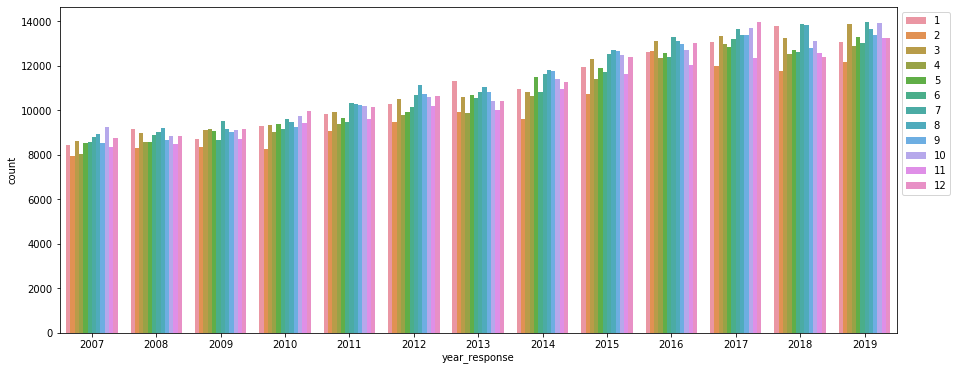

In [25]:
## Distribution of number of incidents across each year, each month

plt.figure(figsize=(15,6))
sns.countplot(x='year_response', hue = 'month_response', data = fireDataFrame)
sns.set_color_codes('muted')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

In [26]:
# pie plot 
plt.figure(figsize = (8,8))
explode = [0,0.2,0,0,0,0,0,0,0,0,0,0]   
plt.pie(firePivotTable.values.flatten(),explode = explode,labels= labelssss,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

NameError: name 'firePivotTable' is not defined

<Figure size 576x576 with 0 Axes>

In [31]:
y_07_incidents = pd.pivot_table(y_07, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_07_incidents.rename(columns = {'incident_number':'2007'}, inplace = True)
y_08_incidents = pd.pivot_table(y_08, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_08_incidents.rename(columns = {'incident_number':'2008'}, inplace = True)
y_09_incidents = pd.pivot_table(y_09, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_09_incidents.rename(columns = {'incident_number':'2009'}, inplace = True)
y_10_incidents = pd.pivot_table(y_10, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_10_incidents.rename(columns = {'incident_number':'2010'}, inplace = True)
y_11_incidents = pd.pivot_table(y_11, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_11_incidents.rename(columns = {'incident_number':'2011'}, inplace = True)
y_12_incidents = pd.pivot_table(y_12, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_12_incidents.rename(columns = {'incident_number':'2012'}, inplace = True)
y_13_incidents = pd.pivot_table(y_13, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_13_incidents.rename(columns = {'incident_number':'2013'}, inplace = True)
y_14_incidents = pd.pivot_table(y_14, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_14_incidents.rename(columns = {'incident_number':'2014'}, inplace = True)
y_15_incidents = pd.pivot_table(y_15, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_15_incidents.rename(columns = {'incident_number':'2015'}, inplace = True)
y_16_incidents = pd.pivot_table(y_16, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_16_incidents.rename(columns = {'incident_number':'2016'}, inplace = True)
y_17_incidents = pd.pivot_table(y_17, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_17_incidents.rename(columns = {'incident_number':'2017'}, inplace = True)
y_18_incidents = pd.pivot_table(y_18, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_18_incidents.rename(columns = {'incident_number':'2018'}, inplace = True)
y_19_incidents = pd.pivot_table(y_19, values='incident_number', index=['month_response'], columns=[], aggfunc=np.ma.count, fill_value=0)
y_19_incidents.rename(columns = {'incident_number':'2019'}, inplace = True)

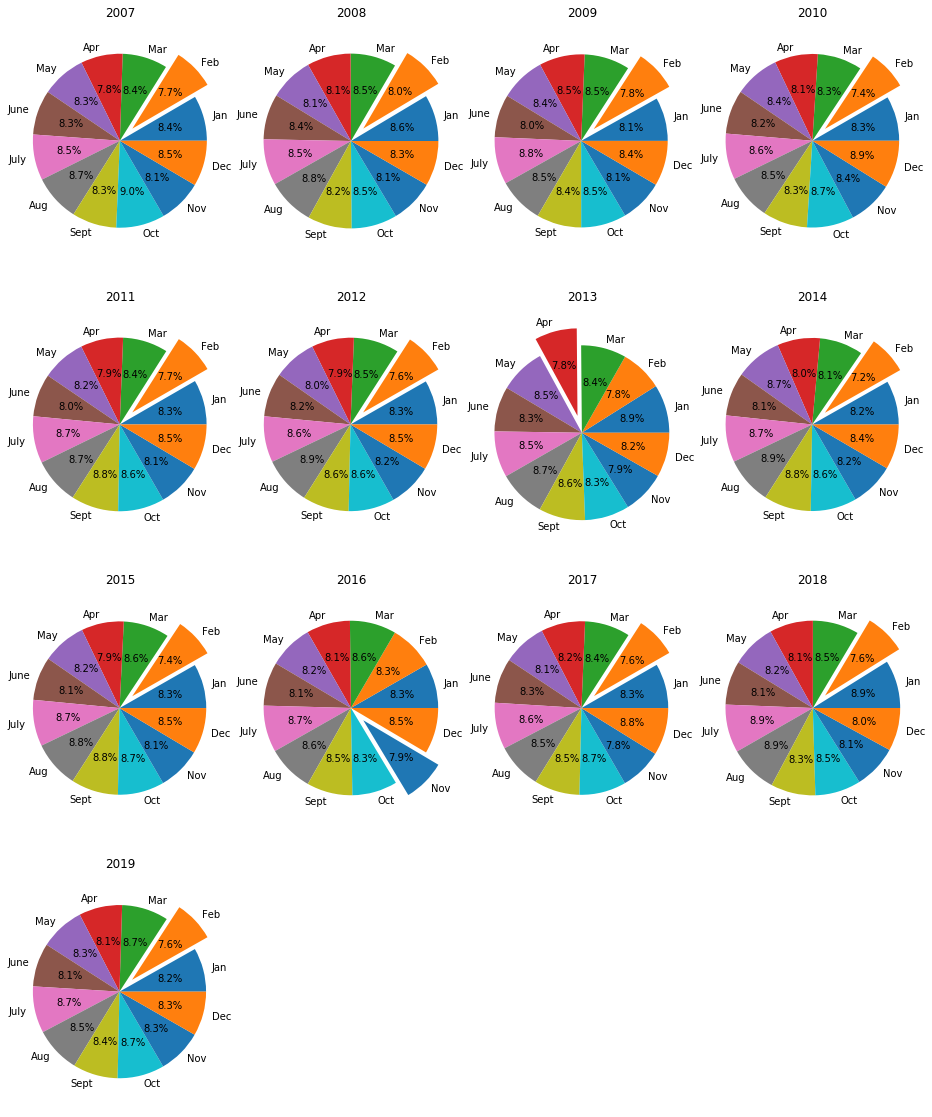

In [32]:
## YEAR WISE DISTRIBUTION OF INCIDENTS WITH THE HIGHLIGHT OF THE MONTH IN WHICH LEAST CASES WERE RECORDED
final_list = []
final_list.append(y_07_incidents)
final_list.append(y_08_incidents)
final_list.append(y_09_incidents)
final_list.append(y_10_incidents)
final_list.append(y_11_incidents)
final_list.append(y_12_incidents)
final_list.append(y_13_incidents)
final_list.append(y_14_incidents)
final_list.append(y_15_incidents)
final_list.append(y_16_incidents)
final_list.append(y_17_incidents)
final_list.append(y_18_incidents)
final_list.append(y_19_incidents)
labelssss = ['Jan','Feb','Mar','Apr', 'May','June','July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
f = plt.figure(figsize = (20,20))
j = 0
k = 0
val = 7
for i in range(0,13):
    explode = [0,0,0,0,0,0,0,0,0,0,0,0]
    idx = np.array(np.argmin(final_list[i].values))
    explode[idx] = 0.2
    ax1 = plt.subplot2grid((4,5),(j,k))
    k += 1
    if k == 4:
        k = 0
        j +=1
    plt.pie(final_list[i].values.flatten(),explode = explode,labels= labelssss,autopct='%1.1f%%')
    if i <=2 :
        plt.title('200%d' %val)
    else:
        plt.title('20%d' %val)
    val +=1
    plt.axis('equal')
#plt.save('pie_chart.jpg')


In [33]:
v = fireDataFrame['date_response']
l = []
for i in v:
    r = str(i)
    r = datetime.strptime(r, '%Y-%m-%d %H:%M:%S')
    k = r.strftime('%H')
    l.append(k)

fireDataFrame['Timestamp'] = pd.Series(l , index = fireDataFrame.index)
#fireDataFrame["Timestamp"] = pd.to_datetime(fireDataFrame.Timestamp, format='%b', errors='coerce').dt.month
fireDataFrame.sort_values(by = 'Timestamp', inplace = True)

In [34]:
## Pivot table for no of incidents acorss the time of the day
Count_table = pd.pivot_table(fireDataFrame, values='incident_number', index=['Timestamp'], columns=[], aggfunc=np.ma.count, fill_value=0)

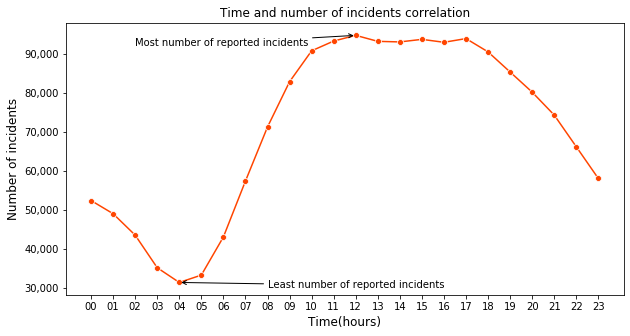

In [48]:
## Read and plot the number of incidents recorded across the day
hour_count  = fireDataFrame['Timestamp'].value_counts()
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(hour_count.index, hour_count.values, color = 'orangered', marker = 'o')
ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Time and number of incidents correlation')
plt.ylabel('Number of incidents', fontsize=12)
plt.xlabel('Time(hours)', fontsize=12)
plt.annotate('Least number of reported incidents', xy=(4,31492), xytext=(8,30000),
            arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.annotate('Most number of reported incidents', xy=(12,94723), xytext=(2,92000),
            arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.savefig('hourcorr.jpg')
plt.show()

Text(255000, 16, 'max at 92101')

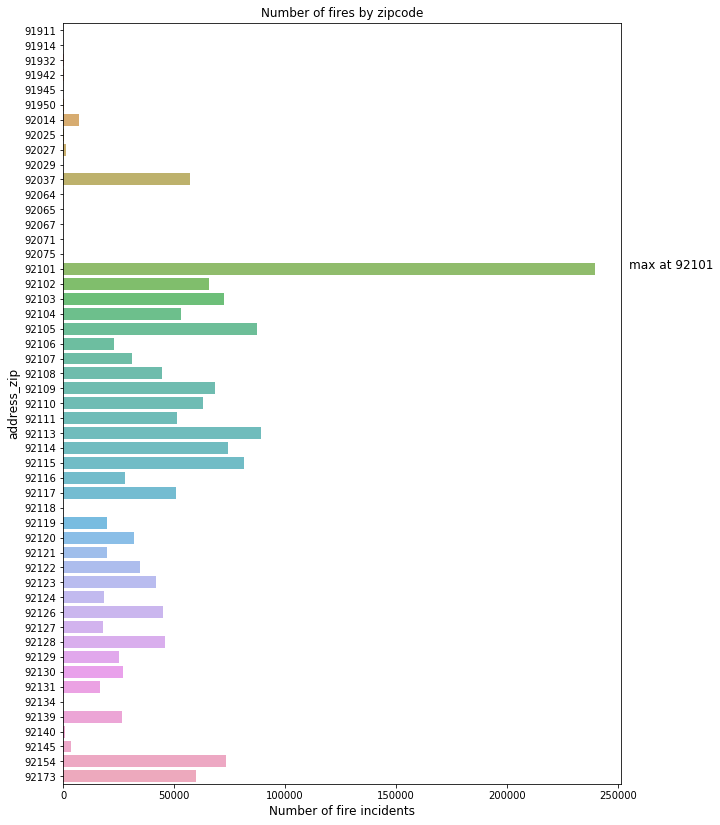

In [66]:
## DISTRIBUTION OF NUMBER OF INCIDENTS ACROSS ALL PIN CODES
zip_count  = fireDataFrame['address_zip'].value_counts()
plt.figure(figsize=(10,14))
ax = sns.barplot(y = zip_count.index, x= zip_count.values, alpha=0.8, orient = 'h')
plt.title('Number of fires by zipcode')
plt.xlabel('Number of fire incidents', fontsize=12)
plt.ylabel('address_zip', fontsize=12)
ax.text(255000,16,'max at 92101',fontsize=12)

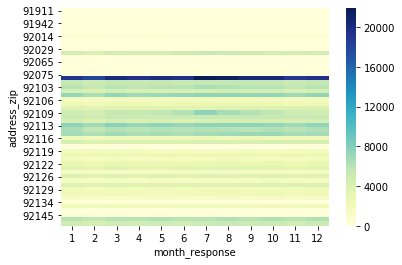

In [67]:
# ## HEAT MAP OF THE DISTRIBUTION OF NUMBER OF INCIDENTS ACROSS EACH ZIP CODE AND ACROSS EVERY MONTH
# monthZipPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=['address_zip'], aggfunc=np.ma.count, fill_value=0)
# ax = sns.heatmap(monthZipPivotTable, cmap='YlGnBu')
## HEAT MAP OF THE DISTRIBUTION OF NUMBER OF INCIDENTS ACROSS EACH ZIP CODE AND ACROSS EVERY MONTH
monthZipPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['address_zip'], columns=['month_response'], aggfunc=np.ma.count, fill_value=0)
ax = sns.heatmap(monthZipPivotTable, cmap='YlGnBu')

In [68]:
## GET THE MERGED PIVOT TABLE
# df = [y_07_incidents,y_08_incidents,y_09_incidents,y_10_incidents,y_11_incidents,y_12_incidents,y_13_incidents,y_14_incidents,y_15_incidents,y_16_incidents,y_17_incidents,y_18_incidents,y_19_incidents]
# merged = functools.reduce(lambda left,right: pd.merge(left,right, on = ['month_response'],how = 'outer'),df)

In [69]:
# ## plot monthly variation across each year 
# f, axes = plt.subplots(13,1, figsize = (10,20), sharex=True)
# #plt.title('Month-to-Month Trend')
# f.text(0.5, 0.1, 'Months', ha='center', fontsize = 20)
# f.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize = 20)
# f.subplots_adjust(hspace=0.1)
# sns.lineplot(month_count_07.index, month_count_07.values, marker = 'o', color = 'b',label = '2007', ax = axes[0])
# sns.lineplot(month_count_08.index, month_count_08.values, marker = 'o', color = 'c', label = '2008', ax = axes[1])
# sns.lineplot(month_count_09.index, month_count_09.values, marker = 'o', color = 'y', label = '2009', ax = axes[2])
# sns.lineplot(month_count_10.index, month_count_10.values, marker = 'o', color = 'r', label = '2010', ax = axes[3])
# sns.lineplot(month_count_11.index, month_count_11.values, marker = 'o', color = 'g', label = '2011', ax = axes[4])
# sns.lineplot(month_count_12.index, month_count_12.values, marker = 'o', color = 'm', label = '2012', ax = axes[5])
# sns.lineplot(month_count_13.index, month_count_13.values, marker = 'o', color = 'y', label = '2013', ax = axes[6])
# sns.lineplot(month_count_14.index, month_count_14.values, marker = 'o', color = 'k', label = '2014', ax = axes[7])
# sns.lineplot(month_count_15.index, month_count_15.values, marker = 'o', color = 'red', label = '2015', ax = axes[8])
# sns.lineplot(month_count_16.index, month_count_16.values, marker = 'o', color = 'violet', label = '2016', ax = axes[9])
# sns.lineplot(month_count_17.index, month_count_17.values, marker = 'o', color = 'goldenrod', label = '2017', ax = axes[10])
# sns.lineplot(month_count_18.index, month_count_18.values, marker = 'o', color = 'lime', label = '2018', ax = axes[11])
# sns.lineplot(month_count_19.index, month_count_19.values, marker = 'o', color = 'crimson', label = '2019', ax = axes[12])
# plt.legend()
# plt.xlim((0,14))
# plt.show()